# Tutorial for gwaslab

- In this tutorial, we will briefly describe the core functions in gwaslab for sumstats QC, standardization and harmonization. 
- We will also show examples of visualization, including Manhattan plots, Q-Q plots and regional plots.


## Download sample data

- Using a jupyter notebook, we first download a sample dataset.
- The dataset we will use as an example is the sumstats of type 2 diabetes from BBJ (K. Suzuki et al., Nature Genetics. 51, 379–386 (2019).)
- File size: 261M

In [1]:
!wget -O t2d_bbj.txt.gz http://jenger.riken.jp/14/

--2022-10-21 15:41:14--  http://jenger.riken.jp/14/
Resolving jenger.riken.jp (jenger.riken.jp)... 134.160.84.25
Connecting to jenger.riken.jp (jenger.riken.jp)|134.160.84.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 274187574 (261M) [text/plain]
Saving to: ‘t2d_bbj.txt.gz’

t2d_bbj.txt.gz      100%[===================>] 261.49M  38.0MB/s    in 7.3s    

2022-10-21 15:41:22 (36.0 MB/s) - ‘t2d_bbj.txt.gz’ saved [274187574/274187574]



## Import gwaslab package

If you installed gwaslab from pip, simply run:

In [1]:
import gwaslab as gl

Or if you want to use the latest version from github (beta version), you can clone the repository and import the package by inserting your package path into the system path like:

In [1]:
import sys
sys.path.insert(0,"/home/yunye/gwaslab/gwaslab/src")
import gwaslab as gl

## Loading data into gwaslab Sumstats

Let's import the raw sumstats into the `gwaslab.Sumstats` Object by specifying the necessary columns.

Note: you can either specify `eaf` (effect allele frequency) or `neaf` (non-effect allele frequency), if `neaf` is specified, it will be converted to `eaf` when loading the sumstats.

In [2]:
mysumstats = gl.Sumstats("t2d_bbj.txt.gz",
             snpid="SNP",
             chrom="CHR",
             pos="POS",
             ea="ALT",
             nea="REF",
             neaf="Frq",
             beta="BETA",
             se="SE",
             p="P",
             direction="Dir",
             n="N",
             sep="\t")

Fri Apr 21 00:49:42 2023 GWASLab version 3.4.7 https://cloufield.github.io/gwaslab/
Fri Apr 21 00:49:42 2023 (C) 2022-2023, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com
Fri Apr 21 00:49:42 2023 Start to initiate from file :t2d_bbj.txt.gz
Fri Apr 21 00:50:02 2023  -Reading columns          : Dir,SE,ALT,P,SNP,REF,POS,N,CHR,BETA,Frq
Fri Apr 21 00:50:02 2023  -Renaming columns to      : DIRECTION,SE,EA,P,SNPID,NEA,POS,N,CHR,BETA,EAF
Fri Apr 21 00:50:02 2023  -Current Dataframe shape : 12557761  x  11
Fri Apr 21 00:50:03 2023  -Initiating a status column: STATUS ...
Fri Apr 21 00:50:07 2023  -NEAF is specified...
Fri Apr 21 00:50:07 2023  -Checking if 0<= NEAF <=1 ...
Fri Apr 21 00:50:09 2023  -Converted NEAF to EAF.
Fri Apr 21 00:50:09 2023  -Removed 0 variants with bad NEAF.
Fri Apr 21 00:50:09 2023 Start to reorder the columns...
Fri Apr 21 00:50:09 2023  -Current Dataframe shape : 12557761  x  12
Fri Apr 21 00:50:09 2023  -Reordering columns to    : SNPID,CHR,POS,EA,NEA,EAF,BE

Sumstats are stored in `Sumstats.data` as a pandas.DataFrame, you can check the data like: 

In [3]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:725932_G_A,1,725932,G,A,0.9960,-0.0737,0.1394,0.5970,166718,-?+-,9999999
1,1:725933_A_G,1,725933,G,A,0.0040,0.0737,0.1394,0.5973,166718,+?-+,9999999
2,1:737801_T_C,1,737801,C,T,0.0051,0.0490,0.1231,0.6908,166718,+?-+,9999999
3,1:749963_T_TAA,1,749963,TAA,T,0.8374,0.0213,0.0199,0.2846,166718,-?++,9999999
4,1:751343_T_A,1,751343,T,A,0.8593,0.0172,0.0156,0.2705,166718,-?++,9999999
...,...,...,...,...,...,...,...,...,...,...,...,...
12557756,X:154874837_A_G,X,154874837,G,A,0.7478,-0.0064,0.0117,0.5840,191764,-+-+,9999999
12557757,X:154875192_GTACTC_G,X,154875192,GTACTC,G,0.2525,0.0071,0.0122,0.5612,191764,+-+-,9999999
12557758,X:154879115_A_G,X,154879115,G,A,0.7463,-0.0070,0.0122,0.5646,191764,-+-+,9999999
12557759,X:154880669_T_A,X,154880669,T,A,0.2558,0.0071,0.0122,0.5618,191764,+-+-,9999999


- For details on gwaslab Sumstats Object, see: https://cloufield.github.io/gwaslab/SumstatsObject/

## Create Manhattan plots and Q-Q plots

The first thing you want to check is probably the Manhattan and Q-Q plots for your sumstats. 

gwaslab will conduct a minimal QC for sumstats when plotting.

Fri Apr 21 00:30:01 2023 Start to plot manhattan/qq plot with the following basic settings:
Fri Apr 21 00:30:01 2023  -Genome-wide significance level is set to 5e-08 ...
Fri Apr 21 00:30:01 2023  -Raw input contains 12557761 variants...
Fri Apr 21 00:30:01 2023  -Plot layout mode is : mqq
Fri Apr 21 00:30:05 2023 Finished loading specified columns from the sumstats.
Fri Apr 21 00:30:05 2023 Start conversion and sanity check:
Fri Apr 21 00:30:06 2023  -Removed 0 variants with nan in CHR or POS column ...
Fri Apr 21 00:30:07 2023  -Removed 0 variants with nan in P column ...
Fri Apr 21 00:30:08 2023  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Fri Apr 21 00:30:08 2023  -sumstats P values are being converted to -log10(P)...
Fri Apr 21 00:30:10 2023  -Sanity check: 0 na/inf/-inf variants will be removed...
Fri Apr 21 00:30:12 2023  -Maximum -log10(P) values is 167.58838029403677 .
Fri Apr 21 00:30:12 2023 Finished data conversion and sanity c

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.Log.Log at 0x7f04be291a00>)

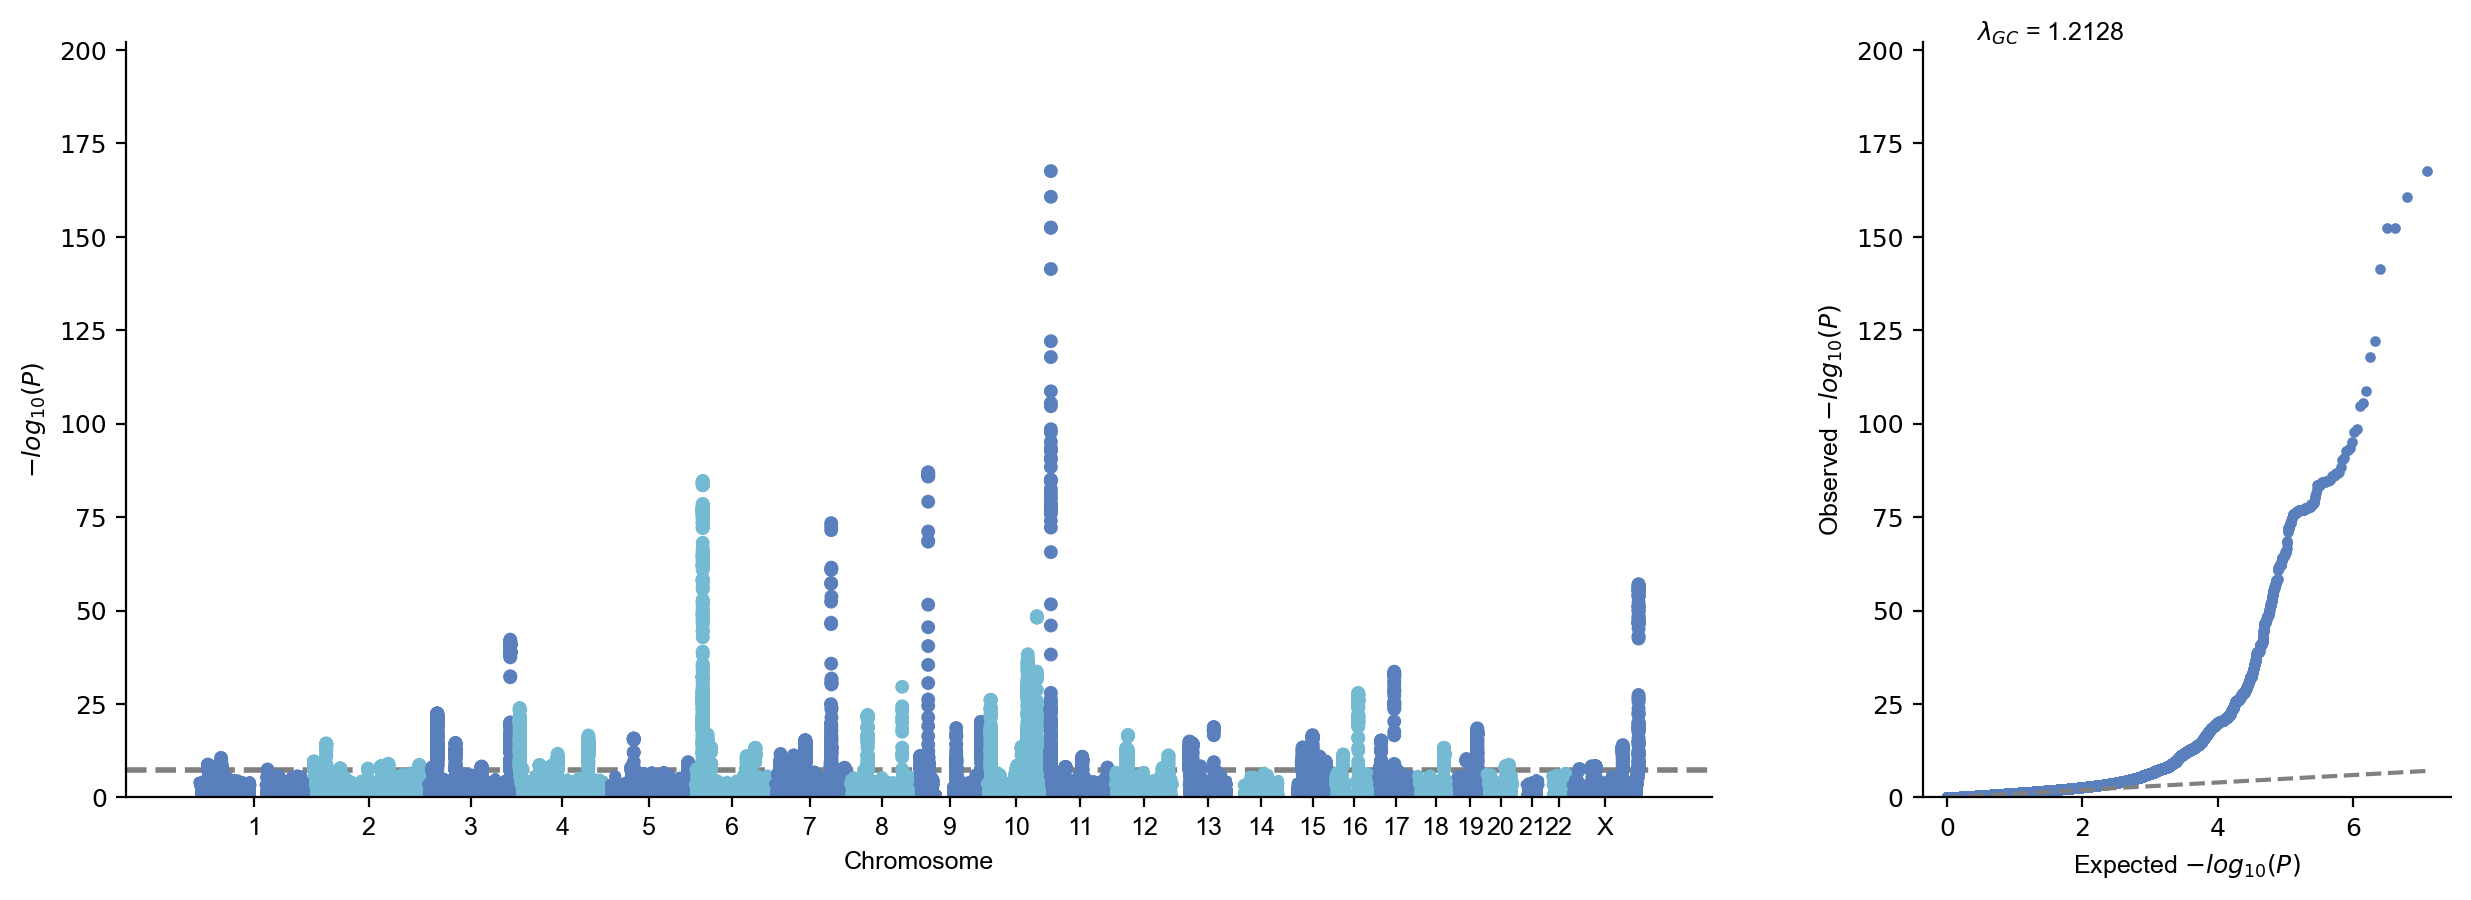

In [3]:
mysumstats.plot_mqq()

Using `.plot_mqq()`, you can easily plot the Manhattan and QQ plot, but the plots without any manipulations are not really informative in this case, and plotting all points takes a relatively long time. The most significant locus dwarfed other less signicant loci. To adjust the plot, gwaslab provides a wide range of options for customization. For example, we can use `skip` and `cut` :

- skip : skip variants with MLOG10P < `skip` for faster plotting speed
- cut : rescale the MLOG10P values when MLOG10P > `cut`  

Wed Apr 19 15:44:09 2023 Start to plot manhattan/qq plot with the following basic settings:
Wed Apr 19 15:44:09 2023  -Genome-wide significance level is set to 5e-08 ...
Wed Apr 19 15:44:09 2023  -Raw input contains 12557761 variants...
Wed Apr 19 15:44:09 2023  -Plot layout mode is : mqq
Wed Apr 19 15:44:23 2023 Finished loading specified columns from the sumstats.
Wed Apr 19 15:44:23 2023 Start conversion and sanity check:
Wed Apr 19 15:44:26 2023  -Removed 0 variants with nan in CHR or POS column ...
Wed Apr 19 15:44:28 2023  -Removed 0 variants with nan in P column ...
Wed Apr 19 15:44:29 2023  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Wed Apr 19 15:44:30 2023  -sumstats P values are being converted to -log10(P)...
Wed Apr 19 15:44:32 2023  -Sanity check: 0 na/inf/-inf variants will be removed...
Wed Apr 19 15:44:36 2023  -Maximum -log10(P) values is 167.58838029403677 .
Wed Apr 19 15:44:36 2023  -Minus log10(P) values above 20 will

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.Log.Log at 0x7f84a5fba190>)

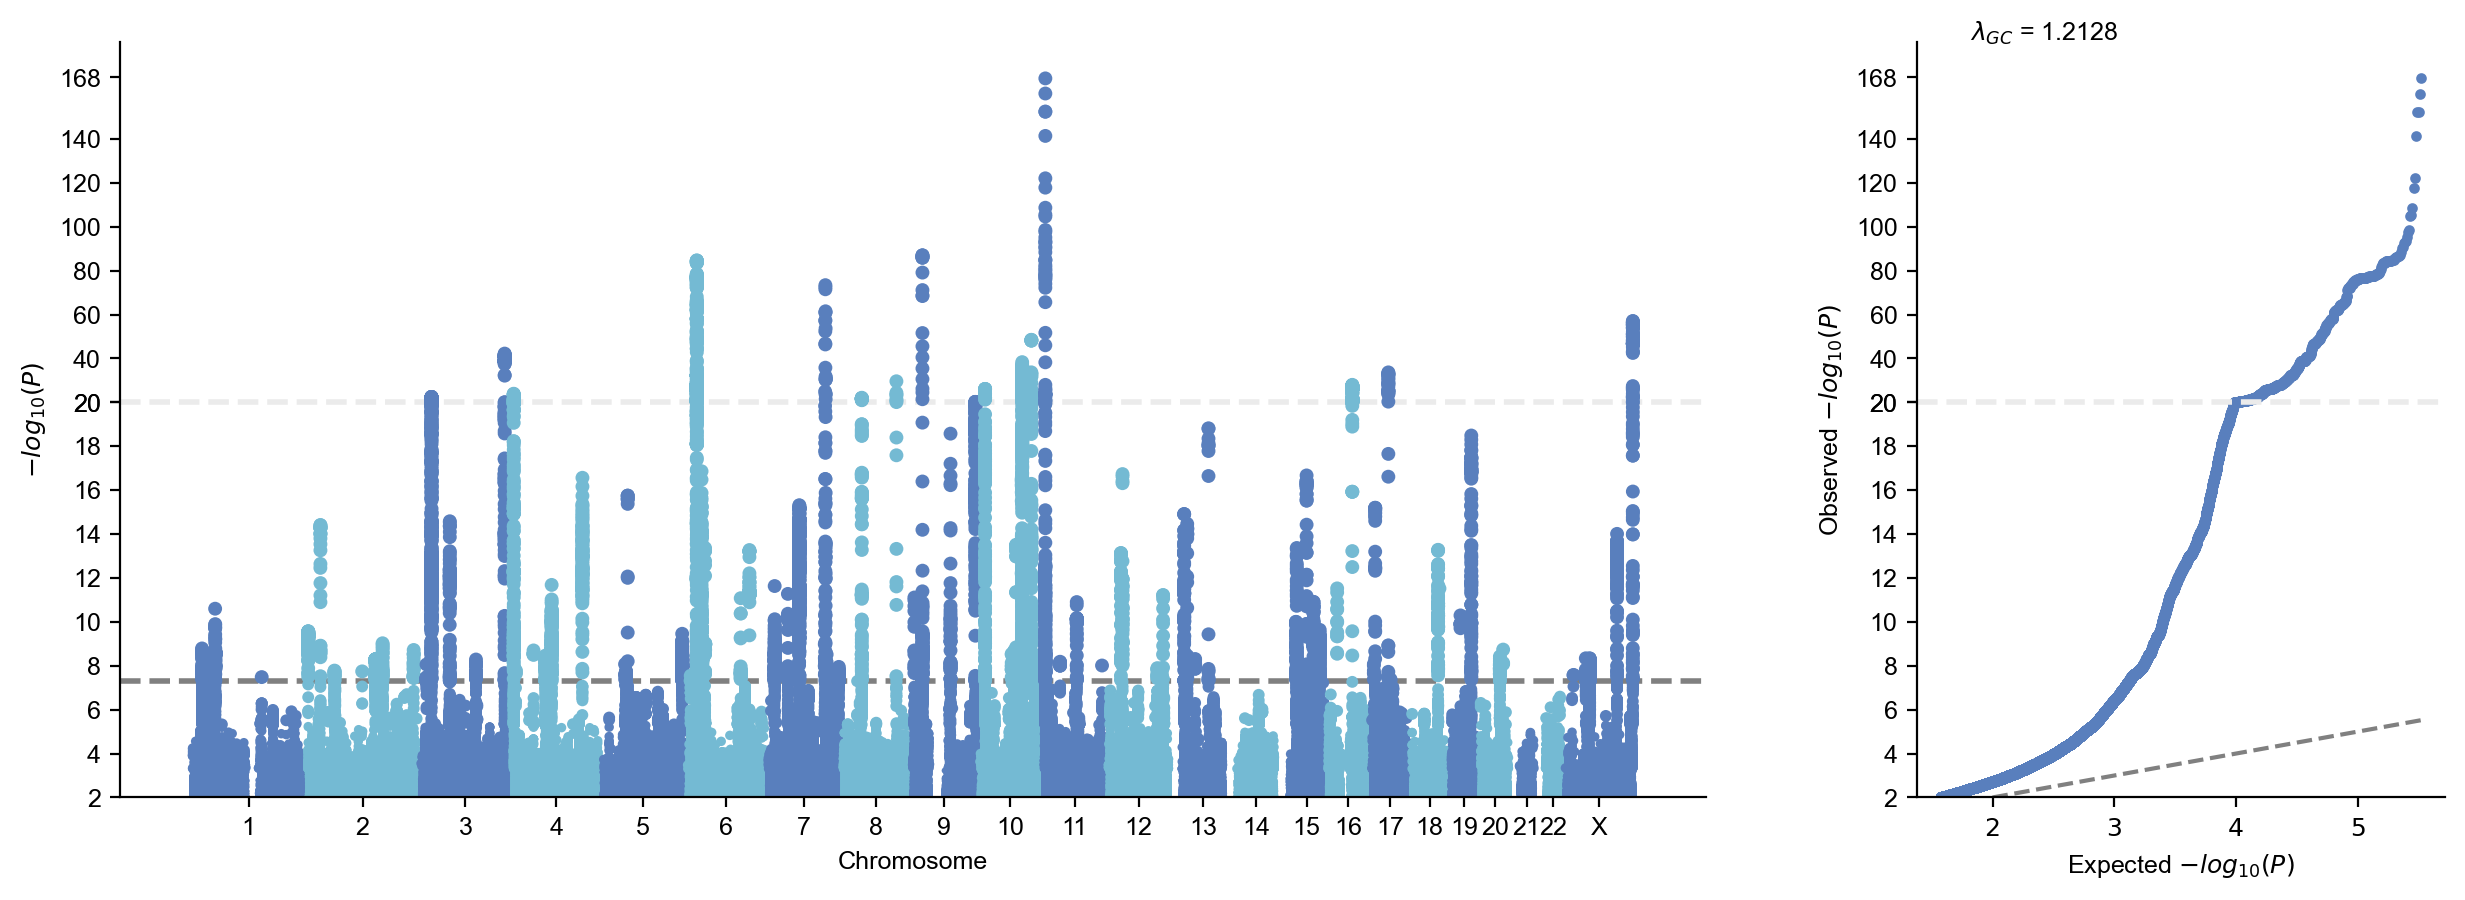

In [5]:
mysumstats.plot_mqq(skip=2, cut=20)

Looks better now. But we want to annotate some of the most significant loci (for example, lead variants with MLOG10P>30).

Wed Apr 19 15:44:54 2023 Start to plot manhattan/qq plot with the following basic settings:
Wed Apr 19 15:44:54 2023  -Genome-wide significance level is set to 5e-08 ...
Wed Apr 19 15:44:54 2023  -Raw input contains 12557761 variants...
Wed Apr 19 15:44:54 2023  -Plot layout mode is : mqq
Wed Apr 19 15:44:58 2023 Finished loading specified columns from the sumstats.
Wed Apr 19 15:44:58 2023 Start conversion and sanity check:
Wed Apr 19 15:45:02 2023  -Removed 0 variants with nan in CHR or POS column ...
Wed Apr 19 15:45:07 2023  -Removed 0 variants with nan in P column ...
Wed Apr 19 15:45:09 2023  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Wed Apr 19 15:45:12 2023  -sumstats P values are being converted to -log10(P)...
Wed Apr 19 15:45:13 2023  -Sanity check: 0 na/inf/-inf variants will be removed...
Wed Apr 19 15:45:16 2023  -Maximum -log10(P) values is 167.58838029403677 .
Wed Apr 19 15:45:16 2023  -Minus log10(P) values above 20 will

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.Log.Log at 0x7f84a5fba190>)

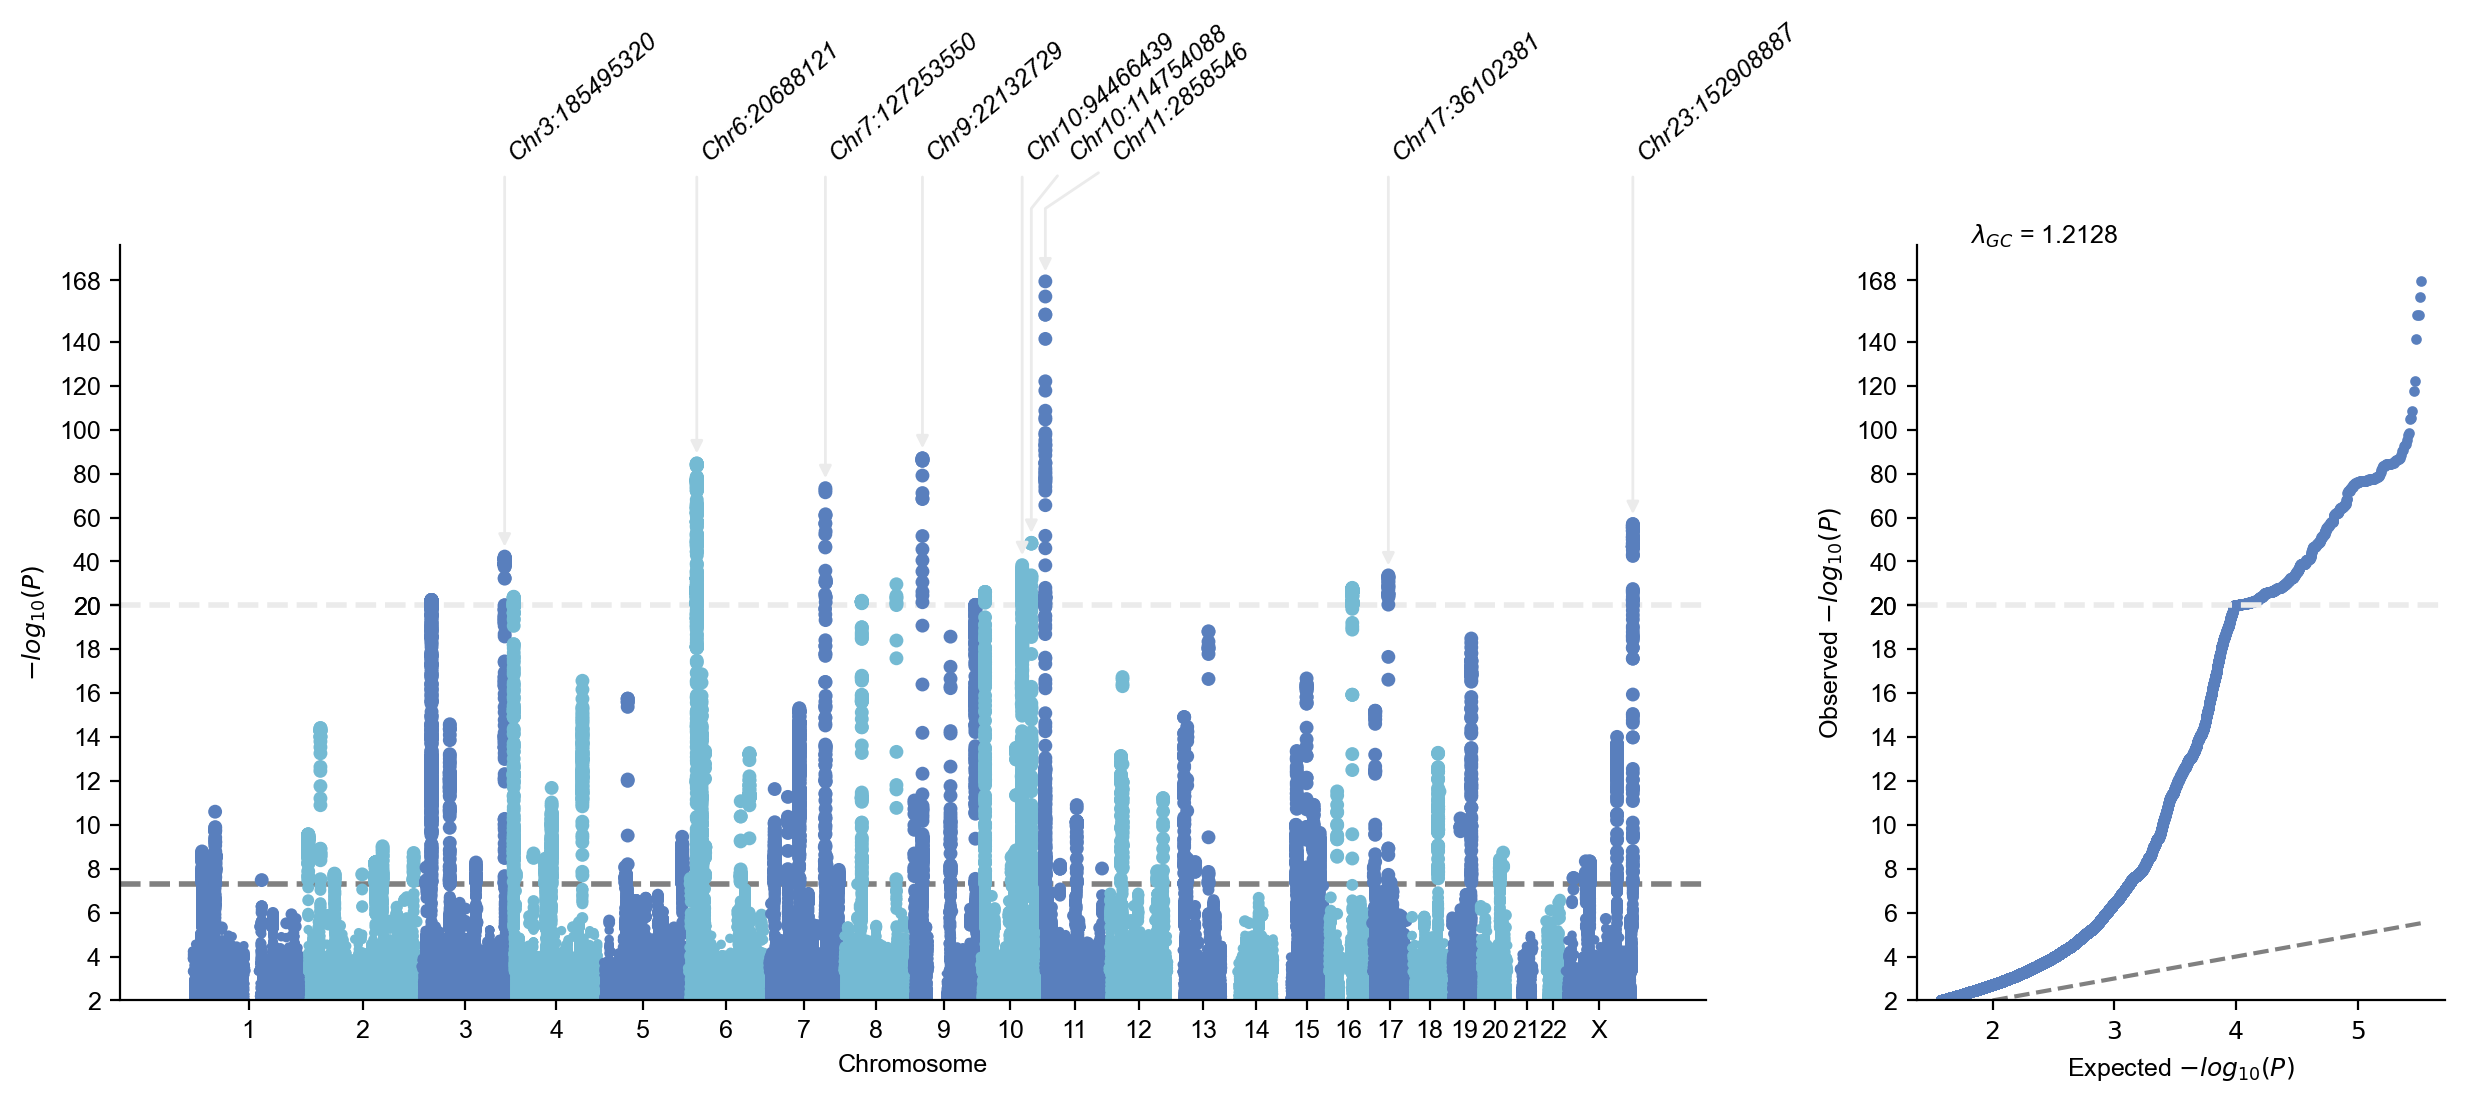

In [6]:
mysumstats.plot_mqq(skip=2, cut=20, anno=True, sig_level_lead=1e-30)

gwaslab supports a wide range of customizable options. For details on other options for Manhattan and Q-Q plots, see: https://cloufield.github.io/gwaslab/Visualization/

## Standardization & QC : `.basic_check()`

It is needed to check variant ID (SNPID), rsID, chromosome(CHR), basepair position(POS), alleles (EA and NEA) and statistics first before any manipulations or analysis. gwaslab provides a all-in-one function for this, `.basic_check()`.

Note: Sometimes you need do this before plotting if the sumstats are not in a standard format.

In [4]:
#check SNPID,rsID,CHR,POS,EA, NEA and statistics
mysumstats.basic_check()

Fri Apr 21 00:33:04 2023 Start to check IDs...
Fri Apr 21 00:33:04 2023  -Current Dataframe shape : 12557761  x  12
Fri Apr 21 00:33:04 2023  -Checking if SNPID is chr:pos:ref:alt...(separator: - ,: , _)
Fri Apr 21 00:33:18 2023 Finished checking IDs successfully!
Fri Apr 21 00:33:18 2023 Start to fix chromosome notation...
Fri Apr 21 00:33:18 2023  -Current Dataframe shape : 12557761  x  12
Fri Apr 21 00:33:18 2023  -Checking CHR data type...
Fri Apr 21 00:33:41 2023  -Vairants with standardized chromosome notation: 12228970
Fri Apr 21 00:34:04 2023  -Vairants with fixable chromosome notations: 328791
Fri Apr 21 00:34:04 2023  -No unrecognized chromosome notations...
Fri Apr 21 00:34:06 2023  -Identifying non-autosomal chromosomes : X, Y, and MT ...
Fri Apr 21 00:34:06 2023  -Identified  328791  variants on sex chromosomes...
Fri Apr 21 00:34:07 2023  -Standardizing sex chromosome notations: X to 23...
Fri Apr 21 00:34:21 2023 Finished fixing chromosome notation successfully!
Fri Apr 

In [8]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:725932_G_A,1,725932,G,A,0.9960,-0.0737,0.1394,0.5970,166718,-?+-,9960099
1,1:725933_A_G,1,725933,G,A,0.0040,0.0737,0.1394,0.5973,166718,+?-+,9960099
2,1:737801_T_C,1,737801,C,T,0.0051,0.0490,0.1231,0.6908,166718,+?-+,9960099
3,1:749963_T_TAA,1,749963,TAA,T,0.8374,0.0213,0.0199,0.2846,166718,-?++,9960399
4,1:751343_T_A,1,751343,T,A,0.8593,0.0172,0.0156,0.2705,166718,-?++,9960099
...,...,...,...,...,...,...,...,...,...,...,...,...
12557756,X:154874837_A_G,23,154874837,G,A,0.7478,-0.0064,0.0117,0.5840,191764,-+-+,9960099
12557757,X:154875192_GTACTC_G,23,154875192,GTACTC,G,0.2525,0.0071,0.0122,0.5612,191764,+-+-,9960399
12557758,X:154879115_A_G,23,154879115,G,A,0.7463,-0.0070,0.0122,0.5646,191764,-+-+,9960099
12557759,X:154880669_T_A,23,154880669,T,A,0.2558,0.0071,0.0122,0.5618,191764,+-+-,9960099


By checking the log, we can see that the sumstats look good. But we still found several variants that were not normalized. gwaslab fixed the position and alleles for the un-normalizated indels. And gwaslab standardize the notation for chromosome X to 23.

In fact, `.basic_check()` is a wrapper of the following basic functions, you can also use these separately.

- mysumstats.fix_ID()
- mysumstats.fix_chr()
- mysumstats.fix_pos()
- mysumstats.fix_allele()
- mysumstats.check_sanity()
- mysumstats.normalize_allele()

For other options, see: https://cloufield.github.io/gwaslab/Standardization/

## Extract lead variants : get_lead()

Let's extract the lead variants in each significant loci to check our data.

The significant loci are detected based on a sliding window (default window size: `windowsizekb=500` kb)

By specifying `anno=True` , gwaslab will also annotate the lead variant with its nearest gene names and distance.

**Note**: gwaslab default genome build version is `build="19"` (GRCh37/hg19), you can change it to `build="38"` (GRCh38/hg38) when needed.

**Note**: gwaslab will donwload reference files when you run it for the first time. In this case, `ensembl_hg19_gtf_protein_coding` was downloaded and processed.

In [9]:
mysumstats.get_lead(anno=True)

Wed Apr 19 15:55:14 2023 Start to extract lead variants...
Wed Apr 19 15:55:14 2023  -Processing 12557761 variants...
Wed Apr 19 15:55:14 2023  -Significance threshold : 5e-08
Wed Apr 19 15:55:14 2023  -Sliding window size: 500  kb
Wed Apr 19 15:55:26 2023  -Found 9461 significant variants in total...
Wed Apr 19 15:55:28 2023  -Identified 89 lead variants!
Wed Apr 19 15:55:28 2023 Start to annotate variants with nearest gene name(s)...
Wed Apr 19 15:55:28 2023  -Assigning Gene name using ensembl_hg19_gtf for protein coding genes
Wed Apr 19 15:55:35 2023 Finished annotating variants with nearest gene name(s) successfully!
Wed Apr 19 15:55:35 2023 Finished extracting lead variants successfully!


,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS,LOCATION,GENE
96739,1:22068326_A_G,1,22068326,G,A,0.7550,0.0621,0.0103,1.629000e-09,191764,++++,9960099,0,USP48
213860,1:51103268_T_C,1,51103268,C,T,0.7953,-0.0802,0.0120,2.519000e-11,191764,----,9960099,0,FAF1
534095,1:154309595_TA_T,1,154309595,TA,T,0.0947,-0.0915,0.0166,3.289000e-08,191764,----,9960399,0,ATP8B2
969974,2:640986_CACAT_C,2,640986,C,CACAT,0.9006,-0.0946,0.0150,2.665000e-10,191764,----,9960399,26349,TMEM18
1091807,2:27734972_G_A,2,27734972,G,A,0.5605,0.0691,0.0088,3.897000e-15,191764,++++,9960099,0,GCKR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272930,X:21569920_A_G,23,21569920,G,A,0.3190,0.0423,0.0076,2.616000e-08,191764,++++,9960099,0,CNKSR2
12341406,X:48724648_CAA_C,23,48724648,C,CAA,0.6260,-0.0602,0.0103,4.576000e-09,191764,----,9960399,26082,TIMM17B
12350767,X:57170781_A_AT,23,57170781,AT,A,0.3003,-0.0447,0.0076,4.583000e-09,191764,----,9960399,-6723,SPIN2A
12469290,X:117915163_T_TA,23,117915163,TA,T,0.5560,0.0548,0.0071,9.818000e-15,191764,++++,9960399,0,IL13RA1


We extracted a total of 89 lead variants with a sliding window size of 500kb!

For other options, see: https://cloufield.github.io/gwaslab/ExtractLead/

## Use the SNPID to create some highly customized mqq plot

gwaslab can create much more complicated Manhattan plots.

For example, 

- annotate the lead variants with closest gene names
- pinpoint some variants
- highlight some loci
- MAF-stratified Q-Q plot
- finally save as my_first_mqq_plot.png with {"dpi":400,"facecolor":"white"}

Fri Apr 21 00:57:26 2023 Start to plot manhattan/qq plot with the following basic settings:
Fri Apr 21 00:57:26 2023  -Genome-wide significance level is set to 5e-08 ...
Fri Apr 21 00:57:26 2023  -Raw input contains 12557761 variants...
Fri Apr 21 00:57:26 2023  -Plot layout mode is : mqq
Fri Apr 21 00:57:26 2023  -Loci to highlight : 7:127253550_C_T,19:46166604_C_T
Fri Apr 21 00:57:26 2023   -Highlight_window is set to:  1000  kb
Fri Apr 21 00:57:26 2023  -Variants to pinpoint : 9:22132729_A_G,5:176513896_C_A
Fri Apr 21 00:57:36 2023 Finished loading specified columns from the sumstats.
Fri Apr 21 00:57:36 2023 Start conversion and sanity check:
Fri Apr 21 00:57:38 2023  -Removed 0 variants with nan in CHR or POS column ...
Fri Apr 21 00:57:39 2023  -Removed 0 variants with nan in EAF column ...
Fri Apr 21 00:57:41 2023  -Removed 0 variants with nan in P column ...
Fri Apr 21 00:57:42 2023  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Fri

(<Figure size 4500x1500 with 2 Axes>, <gwaslab.Log.Log at 0x7f0a58717a30>)

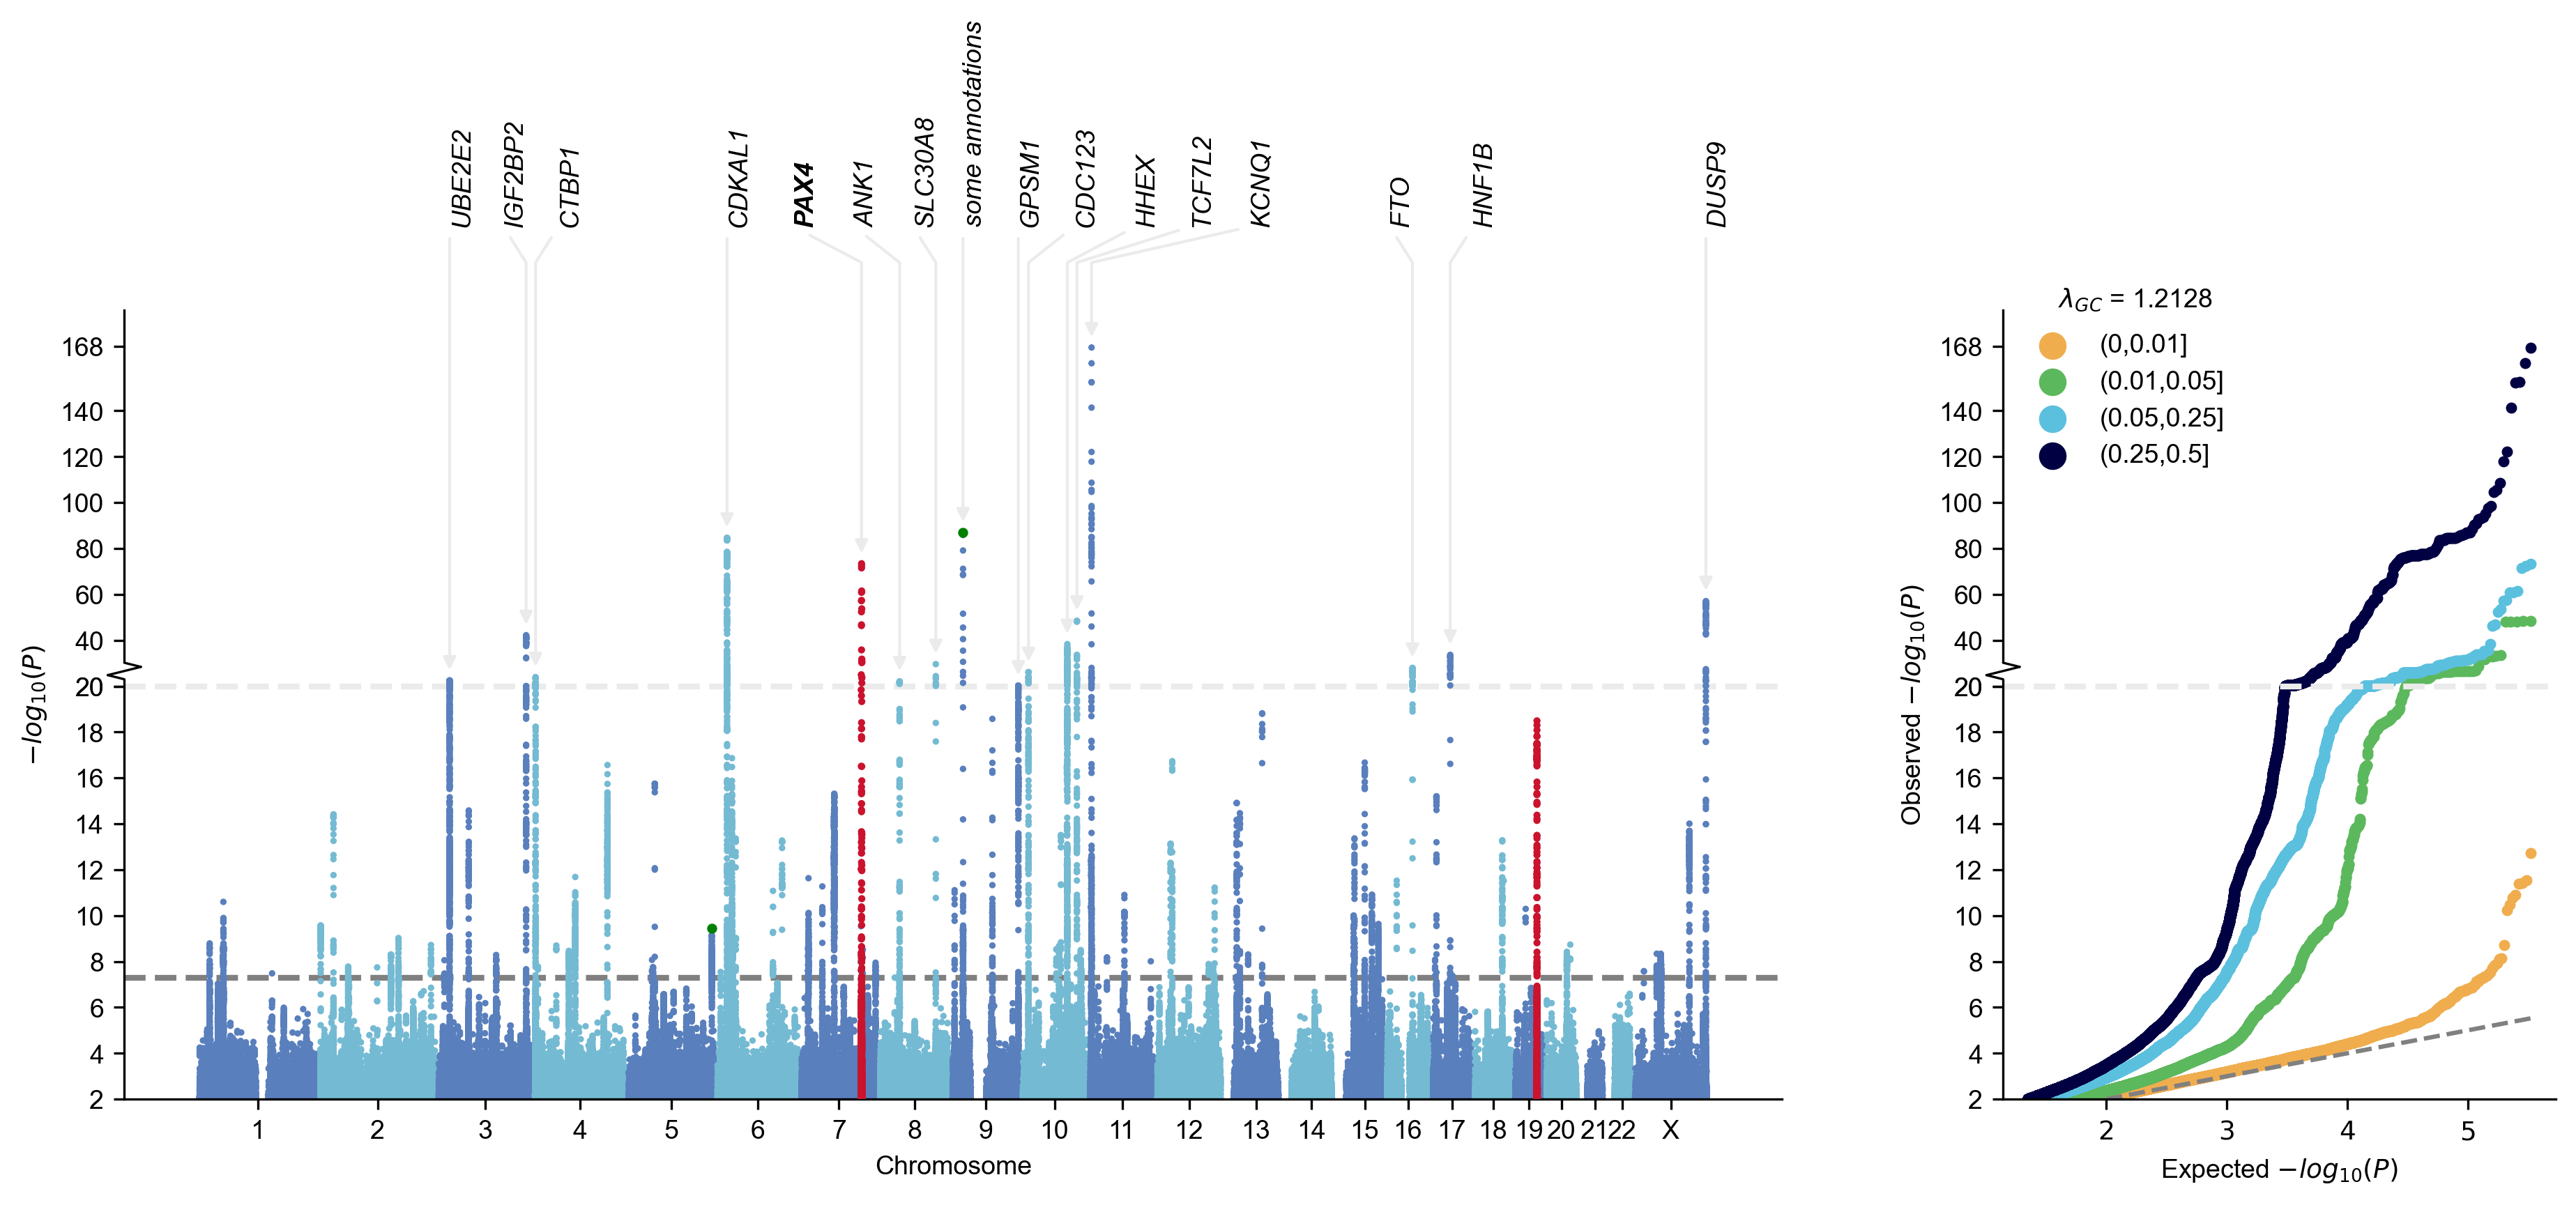

In [9]:
mysumstats.plot_mqq(mode="mqq",
                    cut=20,
                    skip=2,
                    anno="GENENAME",
                    sig_level_lead=1e-20,
                    #anno_set=["9:22132729_A_G","6:20688121_T_A","9:22132729_A_G","15:62394264_G_C"] ,
                    anno_alias={"9:22132729_A_G":"some annotations"},
                    anno_style="expand",
                    pinpoint=["9:22132729_A_G","5:176513896_C_A"], 
                    pinpoint_color="green",
                    highlight=["7:127253550_C_T","19:46166604_C_T"],
                    highlight_windowkb =1000,
                    stratified=True,
                    jagged=True,
                    marker_size=(5,5),
                    figargs={"figsize":(15,5),"dpi":300},
                    save="my_first_mqq_plot.png", 
                    saveargs={"dpi":400,"facecolor":"white"})

For details, see: https://cloufield.github.io/gwaslab/Visualization/

## Quick regional plot without LD-information

gwaslab can also plot regional plots with or with out LD reference files.

For details, see: https://cloufield.github.io/gwaslab/RegionalPlot/

We first create a reginal plot without references by specifying `mode` and `region`.

Wed Apr 19 16:31:04 2023 Start to plot manhattan/qq plot with the following basic settings:
Wed Apr 19 16:31:04 2023  -Genome-wide significance level is set to 5e-08 ...
Wed Apr 19 16:31:04 2023  -Raw input contains 12557761 variants...
Wed Apr 19 16:31:04 2023  -Plot layout mode is : r
Wed Apr 19 16:31:04 2023  -Region to plot : chr7:126253550-128253550.
Wed Apr 19 16:31:06 2023  -Extract SNPs in region : chr7:126253550-128253550...
Wed Apr 19 16:31:49 2023  -Extract SNPs in specified regions: 8087
Wed Apr 19 16:31:50 2023 Finished loading specified columns from the sumstats.
Wed Apr 19 16:31:50 2023 Start conversion and sanity check:
Wed Apr 19 16:31:50 2023  -Removed 0 variants with nan in CHR or POS column ...
Wed Apr 19 16:31:50 2023  -Removed 0 variants with nan in P column ...
Wed Apr 19 16:31:50 2023  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Wed Apr 19 16:31:50 2023  -sumstats P values are being converted to -log10(P)...
Wed Ap

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


Wed Apr 19 16:33:07 2023  -plotting gene track..
Wed Apr 19 16:33:08 2023  -Finished plotting gene track..
Wed Apr 19 16:33:11 2023  -Found 1 significant variants with a sliding window size of 500 kb...
Wed Apr 19 16:33:11 2023 Finished creating Manhattan plot successfully!
Wed Apr 19 16:33:11 2023  -Skip annotating


(<Figure size 3000x2000 with 3 Axes>, <gwaslab.Log.Log at 0x7fb296ec6100>)

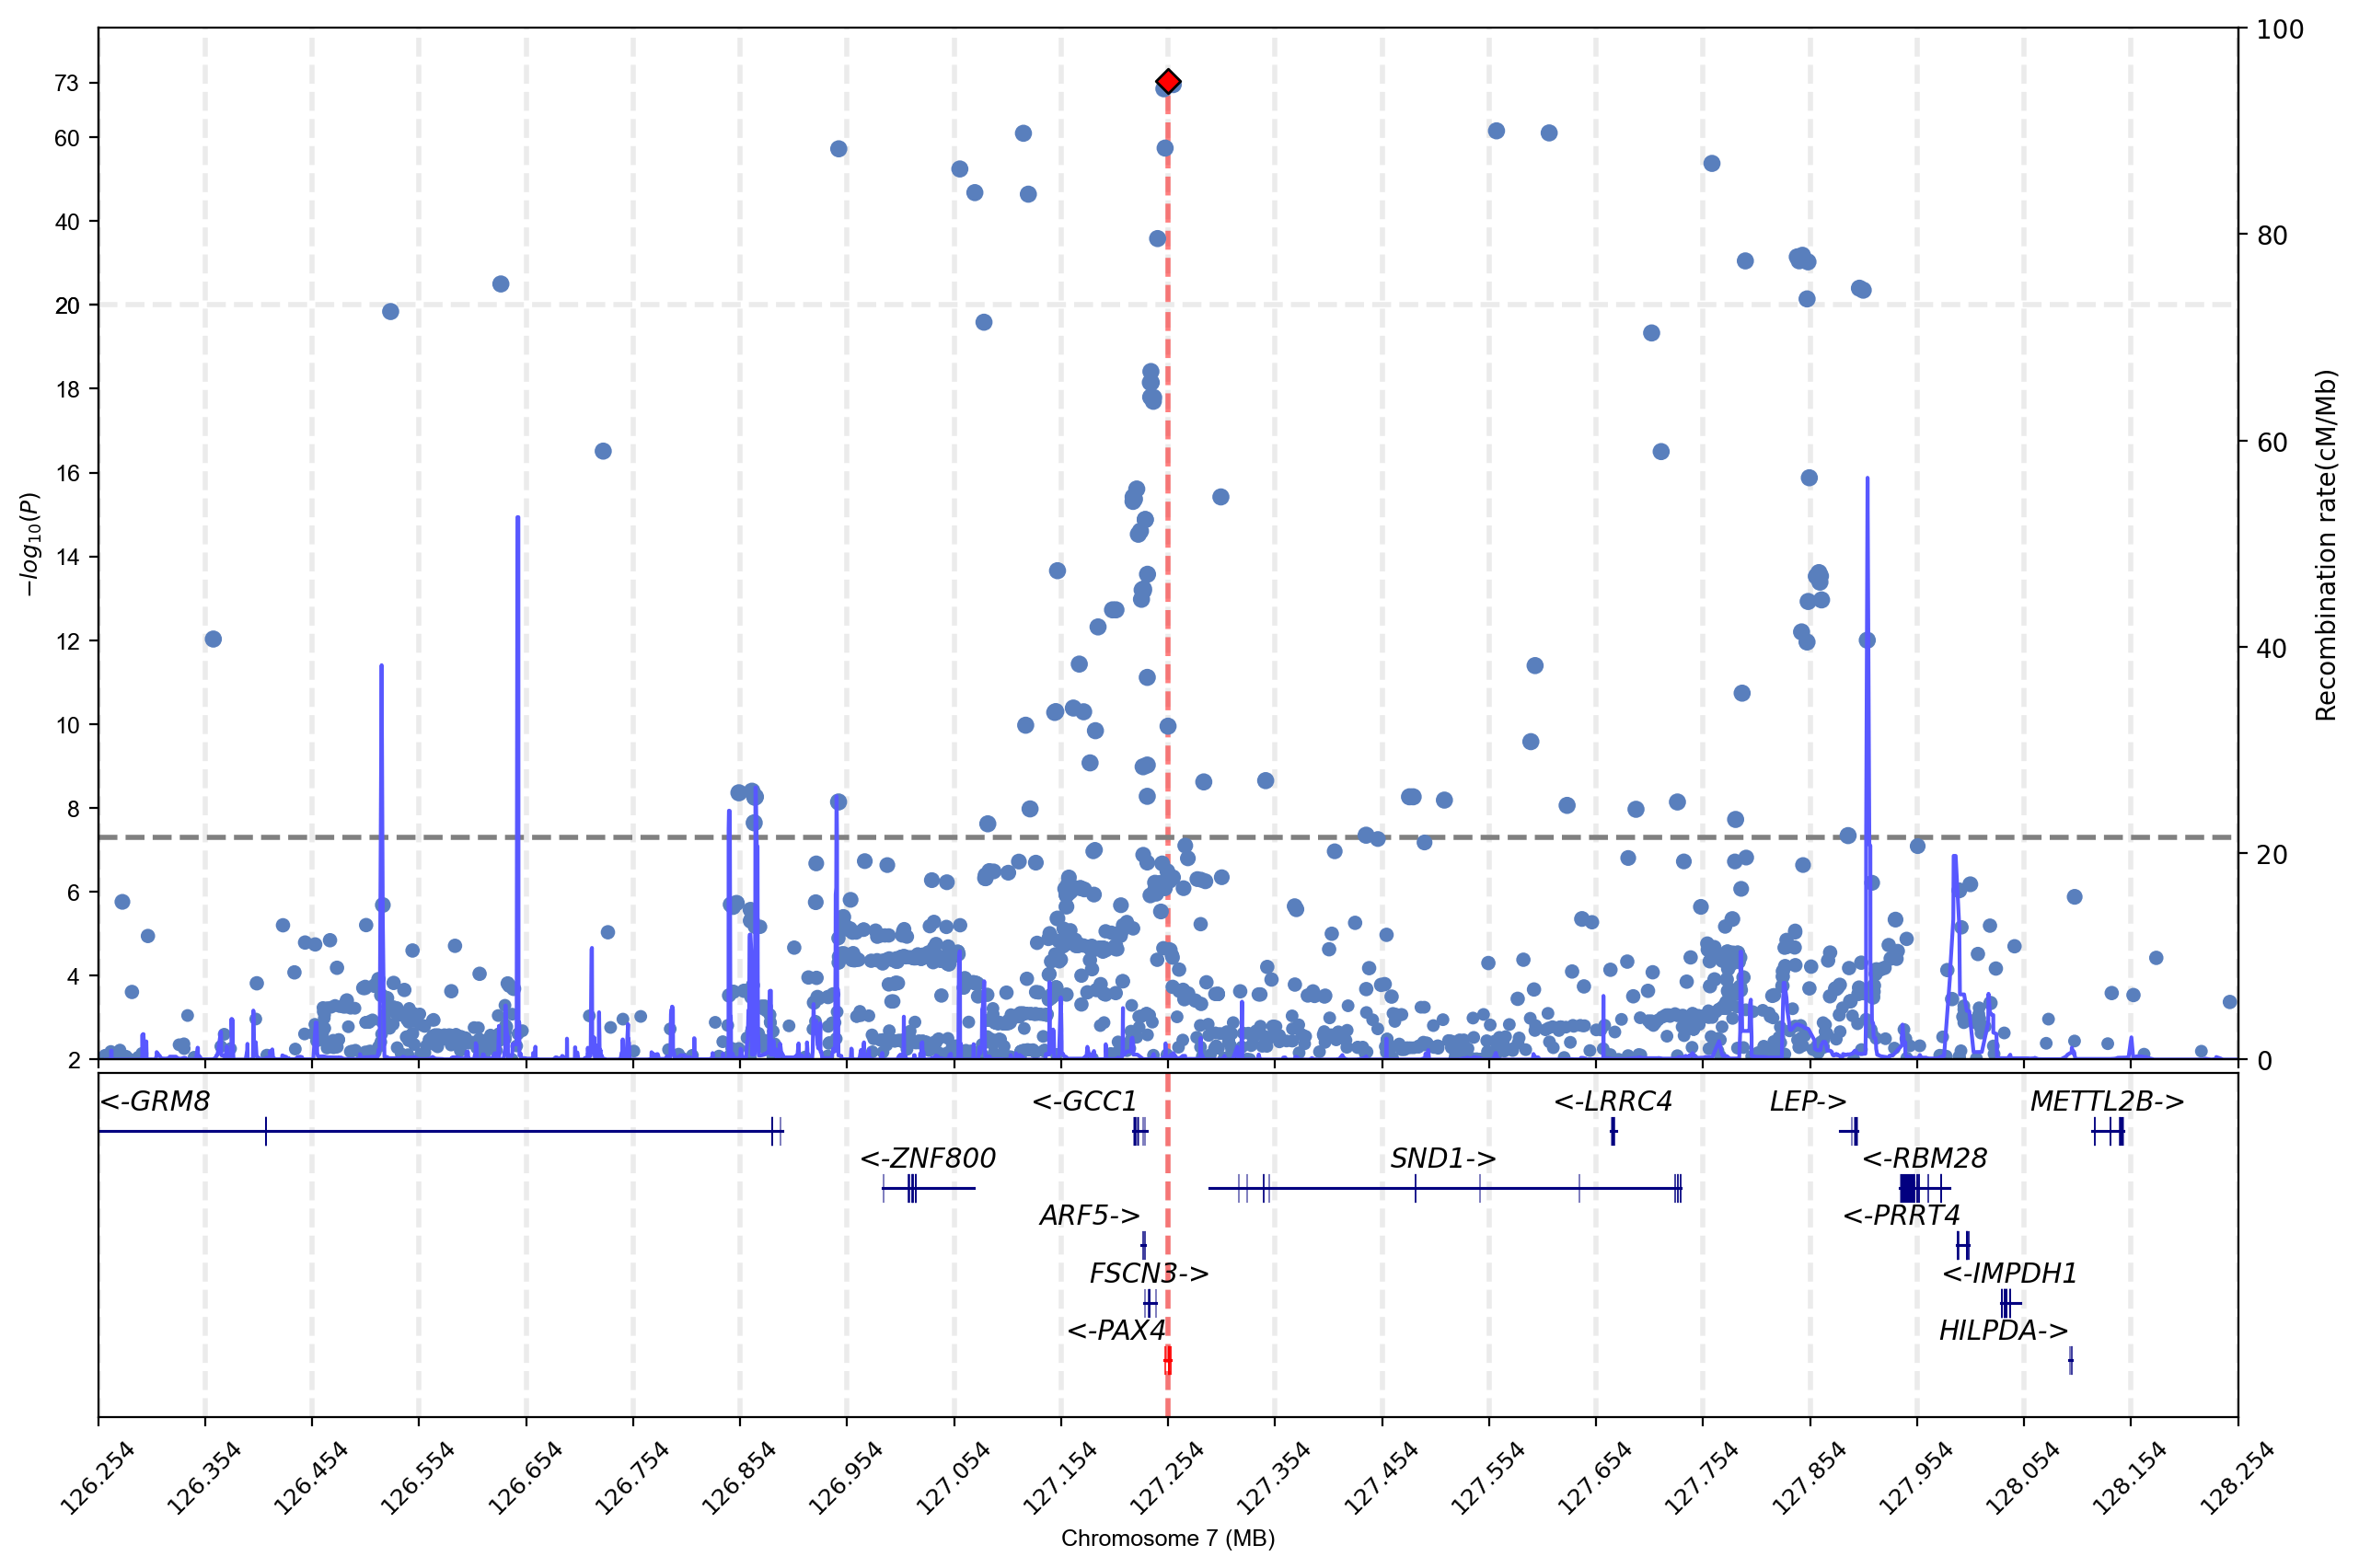

In [3]:
mysumstats.plot_mqq(mode="r",skip=2,cut=20, region=(7,126253550,128253550),region_grid=True)

## reference download

Full regional plot will require user-provided vcf or preprocessed vcf files:
(e.g 1000 Genomes project, see Reference: https://cloufield.github.io/gwaslab/Reference/)

gwaslab also provide pre-processed 1KG datasets.

### check available reference from gwaslab

update the available reference list first

In [4]:
gl.update_available_ref()

Wed Apr 19 16:19:17 2023 Updating available_ref list from: https://raw.github.com/Cloufield/gwaslab/main/src/gwaslab/data/reference.json
Wed Apr 19 16:19:18 2023 Available_ref list has been updated!


In [4]:
gl.check_available_ref()

Wed Apr 19 16:33:50 2023 Start to check available reference files...
Wed Apr 19 16:33:50 2023  - 1kg_eas_hg19  :  https://www.dropbox.com/s/lztaxqhy2o6dpxw/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz?dl=1
Wed Apr 19 16:33:50 2023  - 1kg_eas_hg19_tbi  :  https://www.dropbox.com/s/k9klefl8m9fcfo1/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi?dl=1
Wed Apr 19 16:33:50 2023  - 1kg_eur_hg19  :  https://www.dropbox.com/s/1nbgqshknevseks/EUR.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz?dl=1
Wed Apr 19 16:33:50 2023  - 1kg_eur_hg19_tbi  :  https://www.dropbox.com/s/vscvkrflh6fc5a0/EUR.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi?dl=1
Wed Apr 19 16:33:50 2023  - 1kg_eas_hg38  :  https://www.dropbox.com/s/3dstbbb1el9r3au/EAS.ALL.split_norm_af.1kg_30x.hg38.vcf.gz?dl=1
Wed Apr 19 16:33:50 2023  - 1kg_eas_hg38_tbi  :  https://www.dropbox.com/s/vwnp5vd8dcqksn4/EAS.ALL.split_norm_af.1kg_30x.hg38.vcf.gz.tbi?dl=1
Wed Apr 19 16:33:50 2023  - 1kg_eur_hg38  :  https://www.dropbox.com/s/z0mkehg17lryapv/EUR.ALL.split_no

{'1kg_eas_hg19': 'https://www.dropbox.com/s/lztaxqhy2o6dpxw/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz?dl=1',
 '1kg_eas_hg19_tbi': 'https://www.dropbox.com/s/k9klefl8m9fcfo1/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi?dl=1',
 '1kg_eur_hg19': 'https://www.dropbox.com/s/1nbgqshknevseks/EUR.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz?dl=1',
 '1kg_eur_hg19_tbi': 'https://www.dropbox.com/s/vscvkrflh6fc5a0/EUR.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi?dl=1',
 '1kg_eas_hg38': 'https://www.dropbox.com/s/3dstbbb1el9r3au/EAS.ALL.split_norm_af.1kg_30x.hg38.vcf.gz?dl=1',
 '1kg_eas_hg38_tbi': 'https://www.dropbox.com/s/vwnp5vd8dcqksn4/EAS.ALL.split_norm_af.1kg_30x.hg38.vcf.gz.tbi?dl=1',
 '1kg_eur_hg38': 'https://www.dropbox.com/s/z0mkehg17lryapv/EUR.ALL.split_norm_af.1kg_30x.hg38.vcf.gz?dl=1',
 '1kg_eur_hg38_tbi': 'https://www.dropbox.com/s/ze8g58x75x9qbf0/EUR.ALL.split_norm_af.1kg_30x.hg38.vcf.gz.tbi?dl=1',
 'dbsnp_v151_hg19': 'https://ftp.ncbi.nih.gov/snp/organisms/human_9606_b151_GRCh37p13/VCF/00-All

You can see the current available reference files (from the original source or pre-processed by gwaslab). 

### download reference using gwaslab

Select the keyword and use `download_ref` to download the files. The downloaded files will be placed in `~/.gwasalb` by default.

In [10]:
gl.download_ref("1kg_eas_hg19")

Sat Nov  5 20:48:33 2022 Start to download  1kg_eas_hg19  ...
Sat Nov  5 20:48:33 2022  -Downloading to: /home/yunye/gwaslab/gwaslab/src/gwaslab/data/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz
Sat Nov  5 20:53:19 2022  -Updating record in config file...
Sat Nov  5 20:53:20 2022  -Updating record in config file...
Sat Nov  5 20:53:20 2022  -Downloading to: /home/yunye/gwaslab/gwaslab/src/gwaslab/data/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi
Sat Nov  5 20:53:20 2022 Downloaded  1kg_eas_hg19  successfully!


In [5]:
gl.check_downloaded_ref()

Wed Apr 19 16:33:55 2023 Start to check downloaded reference files...
Wed Apr 19 16:33:55 2023  -Checking the config file:/Users/he/work/git_projects/gwaslab/src/gwaslab/data/config.json
Wed Apr 19 16:33:55 2023  -Config file exists.
Wed Apr 19 16:33:55 2023  -Updating config.json...
Wed Apr 19 16:33:55 2023   - ensembl_hg19_gtf  :  /Users/he/.gwaslab/Homo_sapiens.GRCh37.87.chr.gtf.gz
Wed Apr 19 16:33:55 2023   - 1kg_eas_hg19  :  /Users/he/.gwaslab/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz
Wed Apr 19 16:33:55 2023   - 1kg_eas_hg19_tbi  :  /Users/he/.gwaslab/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi
Wed Apr 19 16:33:55 2023   - recombination_hg19  :  /Users/he/.gwaslab/recombination/hg19/recombination_hg19.tar.gz
Wed Apr 19 16:33:55 2023   - recombination_hg38  :  /Users/he/.gwaslab/recombination/hg38/recombination_hg38.tar.gz
Wed Apr 19 16:33:55 2023   - ensembl_hg38_gtf  :  /Users/he/.gwaslab/Homo_sapiens.GRCh38.109.chr.gtf.gz
Wed Apr 19 16:33:55 2023   - 1kg_eas_hg38  :  /Users/h

{'ensembl_hg19_gtf': '/Users/he/.gwaslab/Homo_sapiens.GRCh37.87.chr.gtf.gz',
 '1kg_eas_hg19': '/Users/he/.gwaslab/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz',
 '1kg_eas_hg19_tbi': '/Users/he/.gwaslab/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi',
 'recombination_hg19': '/Users/he/.gwaslab/recombination/hg19/recombination_hg19.tar.gz',
 'recombination_hg38': '/Users/he/.gwaslab/recombination/hg38/recombination_hg38.tar.gz',
 'ensembl_hg38_gtf': '/Users/he/.gwaslab/Homo_sapiens.GRCh38.109.chr.gtf.gz',
 '1kg_eas_hg38': '/Users/he/.gwaslab/EAS.ALL.split_norm_af.1kg_30x.hg38.vcf.gz',
 '1kg_eas_hg38_tbi': '/Users/he/.gwaslab/EAS.ALL.split_norm_af.1kg_30x.hg38.vcf.gz.tbi'}

After downloading, use `get_path` to obtain the file path by specifying the keyword.

Wed Apr 19 16:34:16 2023 Start to plot manhattan/qq plot with the following basic settings:
Wed Apr 19 16:34:16 2023  -Genome-wide significance level is set to 5e-08 ...
Wed Apr 19 16:34:16 2023  -Raw input contains 12557761 variants...
Wed Apr 19 16:34:16 2023  -Plot layout mode is : r
Wed Apr 19 16:34:16 2023  -Region to plot : chr7:126253550-128253550.
Wed Apr 19 16:34:23 2023  -Extract SNPs in region : chr7:126253550-128253550...
Wed Apr 19 16:35:01 2023  -Extract SNPs in specified regions: 8087
Wed Apr 19 16:35:02 2023 Finished loading specified columns from the sumstats.
Wed Apr 19 16:35:02 2023 Start conversion and sanity check:
Wed Apr 19 16:35:02 2023  -Removed 0 variants with nan in CHR or POS column ...
Wed Apr 19 16:35:02 2023  -Removed 0 variants with nan in P column ...
Wed Apr 19 16:35:02 2023  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Wed Apr 19 16:35:02 2023  -sumstats P values are being converted to -log10(P)...
Wed Ap

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


Wed Apr 19 16:36:13 2023  -plotting gene track..
Wed Apr 19 16:36:14 2023  -Finished plotting gene track..
Wed Apr 19 16:36:16 2023  -Found 1 significant variants with a sliding window size of 500 kb...
Wed Apr 19 16:36:16 2023 Finished creating Manhattan plot successfully!
Wed Apr 19 16:36:16 2023  -Skip annotating


(<Figure size 3000x2000 with 4 Axes>, <gwaslab.Log.Log at 0x7fb296ec6100>)

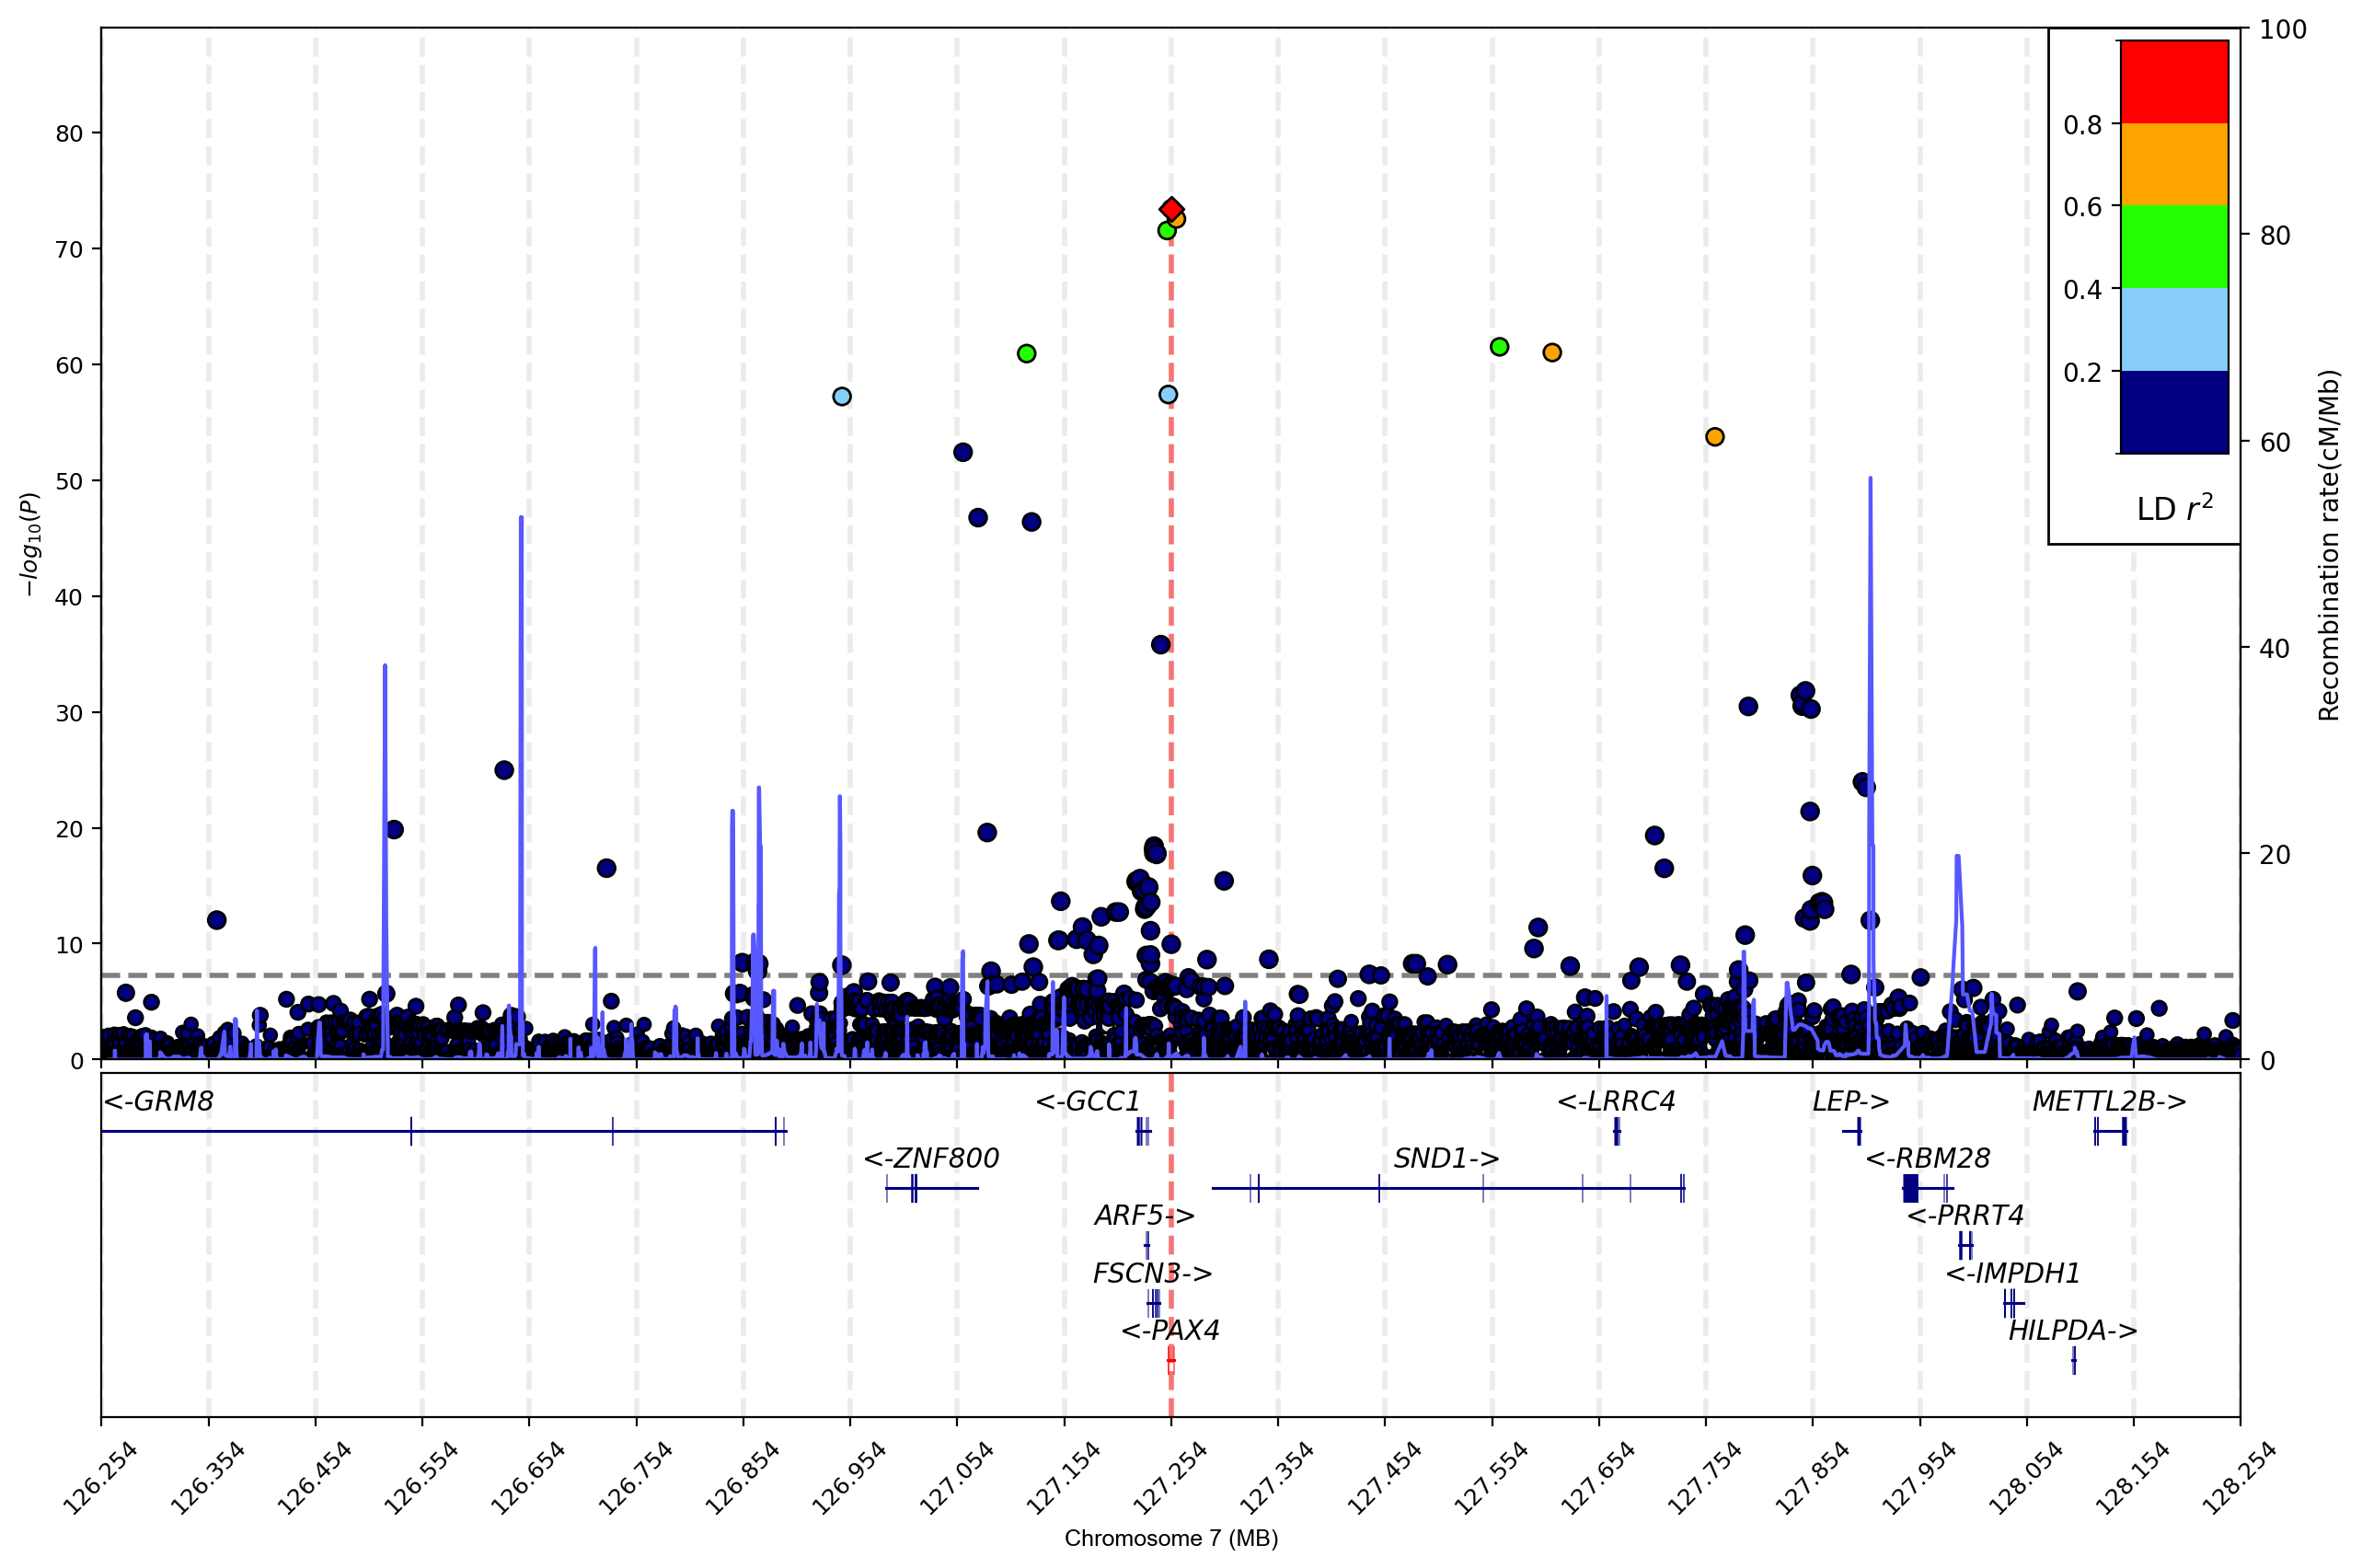

In [6]:
mysumstats.plot_mqq(mode="r",
                    region=(7,126253550,128253550),
                    region_grid=True,
                    anno=True,
                    vcf_path=gl.get_path("1kg_eas_hg19"))

Or you can provide your own vcf files for `vcf_path`. 

In [ ]:
mysumstats.plot_mqq(mode="r",
                    region=(7,156538803,157538803),
                    region_grid=True,
                    anno=True,
                    vcf_path="/home/yunye/mydata/d_disk/eas_1kg_af/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz")

**Note**: gwaslab default genome build version is `build="19"` (GRCh37/hg19), you can change it to `build="38"` (GRCh38/hg38) when needed. For gene tracks, default is `gtf_path="ensembl"` , you can also use `gtf_path="refseq"` (NCBA RefSeq)

## Sampling

There are more than 10 million variants in the original sumstats and it will take some time to process the entrie dataset. Let's just randomly sample 1 million variants for this tutorial.

In [5]:
mysumstats.random_variants(n=100000,inplace=True)

Fri Apr 21 00:35:29 2023 Start to randomly select variants from the sumstats...
Fri Apr 21 00:35:29 2023  -Number of variants selected from the sumstats: 100000
Fri Apr 21 00:35:30 2023 Finished sampling...


## Infer genome build

In case you don't know the genome build of the sumstats 

For details, see: https://cloufield.github.io/gwaslab/InferBuild/

In [8]:
mysumstats.infer_build()

Wed Apr 19 16:39:12 2023 Start to infer genome build version using hapmap3 SNPs...
Wed Apr 19 16:39:12 2023  -Loading Hapmap3 variants data...
Wed Apr 19 16:39:14 2023  -CHR:POS will be used for matching...
Wed Apr 19 16:39:15 2023  -Matching variants for hg19: num_hg19 =  8625
Wed Apr 19 16:39:15 2023  -Matching variants for hg38: num_hg38 =  136
Wed Apr 19 16:39:15 2023  -Warning: please be cautious due to the limited number of variants.
Wed Apr 19 16:39:15 2023  -Since num_hg19 >> num_hg38, assigning genome build hg19...


## fix_id()

You may notice that the SNPID is in CHR:POS_REF_ALT format. We want SNPID to be in a stadardized format chr:pos:ref:alt, we can use fix_id for this:

For other options of standardization, see: https://cloufield.github.io/gwaslab/Standardization/

In [6]:
#fixsep : fix ID separator
mysumstats.fix_id(fixsep=True)

Fri Apr 21 00:35:30 2023 Start to check IDs...
Fri Apr 21 00:35:30 2023  -Current Dataframe shape : 100000  x  12
Fri Apr 21 00:35:30 2023  -Checking if SNPID is chr:pos:ref:alt...(separator: - ,: , _)
Fri Apr 21 00:35:31 2023  -Replacing [_-] in SNPID with ":" ...
Fri Apr 21 00:35:31 2023 Finished checking IDs successfully!


In [7]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
8102917,11:35333603:T:C,11,35333603,C,T,0.0013,0.0713,0.1377,0.60460,191764,++-+,9960099
1365844,2:83990707:C:T,2,83990707,C,T,0.9988,-0.4625,0.2648,0.08069,166718,+?-+,9960099
9716341,14:47755235:G:C,14,47755235,G,C,0.9532,-0.0156,0.0209,0.45460,191764,-+-+,9960099
2232912,3:45471190:C:CT,3,45471190,C,CT,0.8013,0.0043,0.0128,0.73580,191764,-++-,9960399
11059188,18:4037606:A:G,18,4037606,G,A,0.7888,-0.0237,0.0142,0.09636,191764,+---,9960099
...,...,...,...,...,...,...,...,...,...,...,...,...
10246817,15:81360205:T:G,15,81360205,G,T,0.0181,-0.0043,0.0624,0.94470,166718,+?-+,9960099
1875282,2:216657550:T:C,2,216657550,C,T,0.5167,0.0018,0.0088,0.83480,191764,-++-,9960099
361647,1:84552880:C:T,1,84552880,C,T,0.9990,-0.4160,0.2255,0.06504,182216,+--?,9960099
9337274,13:62713357:A:G,13,62713357,G,A,0.4638,-0.0066,0.0095,0.48620,191764,+---,9960099


# assign rsID

- ref_rsid_tsv : tsv file for annotation of common used variants
- ref_rsid_vcf : vcf file for annotation of other variants

In [9]:
gl.download_ref("1kg_dbsnp151_hg19_auto")
# the rsID reference vcf can be downloaded from dbSNP

mysumstats.assign_rsid(n_cores=3,
                       ref_rsid_tsv= gl.get_path("1kg_dbsnp151_hg19_auto"),
                       ref_rsid_vcf= "/home/yunye/mydata/d_disk/dbsnp/GCF_000001405.25.vcf.gz",
                       chr_dict = gl.get_number_to_NC(build="19") )

Fri Apr 21 00:39:18 2023 No records in config file. Please download first.
Fri Apr 21 00:39:18 2023 Start to annotate rsID based on chromosome and position information...
Fri Apr 21 00:39:18 2023  -Current Dataframe shape : 100000  x  12


TypeError: can only concatenate str (not "bool") to str

# Harmonization

gwaslab can harmonize the sumstats based on reference files.

- ref_seq : reference genome fasta file for allele alignment
- ref_infer : vcf file with allele frequency information for inferring strand and comparing allele frequency 
- ref_alt_freq : field in INFO of vcf file for alternative allele frequency

For details see: https://cloufield.github.io/gwaslab/Harmonization/

For reference data, see: https://cloufield.github.io/gwaslab/Reference/

In [12]:
gl.download_ref("1kg_dbsnp151_hg19_auto")

Wed Apr 19 16:56:07 2023 Start to download  1kg_dbsnp151_hg19_auto  ...
Wed Apr 19 16:56:07 2023  -Downloading to: /Users/he/.gwaslab/1kg_dbsnp151_hg19_auto.txt.gz
Wed Apr 19 16:57:27 2023  -Updating record in config file...
Wed Apr 19 16:57:27 2023 Downloaded  1kg_dbsnp151_hg19_auto  successfully!


In [19]:
mysumstats.harmonize(basic_check=False,
                     n_cores=3,
                     ref_seq     = "/Users/he/mydata/Reference/Genome/human_g1k_v37.fasta",
                     ref_infer   = gl.get_path("1kg_eas_hg19"),
                     ref_alt_freq= "AF")

Wed Apr 19 17:19:22 2023 Start to check if NEA is aligned with reference sequence...
Wed Apr 19 17:19:22 2023  -Current Dataframe shape : 100000  x  12
Wed Apr 19 17:19:22 2023  -Reference genome fasta file: /Users/he/mydata/Reference/Genome/human_g1k_v37.fasta
Wed Apr 19 17:19:22 2023  -Checking records: 1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  X  Y  MT  
Wed Apr 19 17:19:57 2023  -Variants allele on given reference sequence :  41675
Wed Apr 19 17:19:57 2023  -Variants flipped :  50037
Wed Apr 19 17:19:57 2023   -Raw Matching rate :  91.71%
Wed Apr 19 17:19:57 2023  -Variants inferred reverse_complement :  0
Wed Apr 19 17:19:57 2023  -Variants inferred reverse_complement_flipped :  0
Wed Apr 19 17:19:57 2023  -Both allele on genome + unable to distinguish :  8288
Wed Apr 19 17:19:57 2023  -Variants not on given reference sequence :  0
Wed Apr 19 17:19:57 2023  -Current Dataframe shape : 100000  x  12
Wed Apr 19 17:19:58 2023 Start to flip allele-s

Check the data again. Looks good!

In [20]:
mysumstats.data

,SNPID,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:844476:T:G,rs368849675,1,844476,G,T,0.1842,0.0125,0.0208,0.54680,166718,+?+-,1960000
1,1:874329:T:C,rs75871540,1,874329,C,T,0.0155,0.1260,0.0656,0.05484,166718,+?++,1960000
2,1:910935:G:A,rs2340592,1,910935,A,G,0.3065,-0.0217,0.0122,0.07462,166718,-?--,1960010
3,1:924368:C:T,rs35562283,1,924368,T,C,0.9942,-0.0016,0.0921,0.98600,191764,+--+,1960010
4,1:1010717:C:T,rs9442368,1,1010717,T,C,0.7930,-0.0222,0.0119,0.06190,191764,---+,1960010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,X:153834877:C:T,rs186032652,23,153834877,T,C,0.0013,0.2046,0.1683,0.22400,166718,+?++,1960010
99996,X:153956104:C:T,rs184823076,23,153956104,T,C,0.0067,-0.0348,0.0643,0.58840,191764,--+-,1960010
99997,X:154440581:C:A,rs148887531,23,154440581,A,C,0.0014,-0.1269,0.1015,0.21150,191764,----,1960010
99998,X:154660311:G:A,rs28860618,23,154660311,A,G,0.7851,-0.0083,0.0084,0.32540,191764,-+-+,1960010


Check the summary of the currrent sumstats (see: https://cloufield.github.io/gwaslab/StatusCode/):

In [41]:
mysumstats.summary()


Values  \
Category Items                                                                  
META     Row_num                                                       100000   
         Column_num                                                        13   
         Column_names       SNPID,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRE...   
         Last_checked_time                           Wed Apr 19 17:44:01 2023   
MISSING  Missing_total                                                    666   
         Missing_rsID                                                     666   
MAF      Common                                                         50568   
         Low_frequency                                                  16982   
         Rare                                                           32386   
P        Minimum                                        5.667000000000001e-85   
         Significant                                                       69   
         Suggestive                                                       136   
STATUS   1960010                                                        42797   
         1960000                                                        34093   
         1960001                                                         6276   
         1960011                                                         6237   
         1960364                                                         4329   
         1960363                                                         3703   
         1960017                                                          611   
         1960007                                                          577   
         1960309                                                          536   
         1960368                                                          256   
         1960319                                                          196   
         1960018                                                          187   
         1960008                                                          184   
         1960002                                                            9   
         1960012                                                            9   

                            Percentage  
Category Items                          
META     Row_num                   NaN  
         Column_num                NaN  
         Column_names              NaN  
         Last_checked_time         NaN  
MISSING  Missing_total            0.67  
         Missing_rsID             0.67  
MAF      Common                  50.57  
         Low_frequency           16.98  
         Rare                    32.39  
P        Minimum                  0.00  
         Significant              0.07  
         Suggestive               0.14  
STATUS   1960010                 42.80  
         1960000                 34.09  
         1960001                  6.28  
         1960011                  6.24  
         1960364                  4.33  
         1960363                  3.70  
         1960017                  0.61  
         1960007                  0.58  
         1960309                  0.54  
         1960368                  0.26  
         1960319                  0.20  
         1960018                  0.19  
         1960008                  0.18  
         1960002                  0.01  
         1960012                  0.01

## Formatting and saving : to_format()

You can easily format the processed sumstats and save it. For details, see: https://cloufield.github.io/gwaslab/Format/

Let's export the sumstats as the default format used in LDSC. 

In [20]:
mysumstats.to_format("clean_sumstats",fmt="ldsc")

Wed Nov  2 13:35:42 2022 Start to format the output sumstats in:  ldsc  format
Wed Nov  2 13:35:42 2022  -Formatting statistics ...
Wed Nov  2 13:35:42 2022  - Float statistics formats:
Wed Nov  2 13:35:42 2022   - Columns: ['EAF', 'BETA', 'SE', 'P']
Wed Nov  2 13:35:42 2022   - Output formats: ['{:.4g}', '{:.4f}', '{:.4f}', '{:.4e}']
Wed Nov  2 13:35:42 2022  - Start outputting sumstats in ldsc format...
Wed Nov  2 13:35:42 2022  -ldsc format will be loaded...
Wed Nov  2 13:35:42 2022  -ldsc format meta info:
Wed Nov  2 13:35:42 2022   - format_name  :  ldsc
Wed Nov  2 13:35:42 2022   - format_source  :  https://github.com/bulik/ldsc/wiki/Summary-Statistics-File-Format
Wed Nov  2 13:35:42 2022   - format_source2  :  https://github.com/bulik/ldsc/blob/master/munge_sumstats.py
Wed Nov  2 13:35:42 2022   - format_version  :  20150306
Wed Nov  2 13:35:42 2022  -gwaslab to ldsc format dictionary:
Wed Nov  2 13:35:42 2022   - gwaslab keys: ['rsID', 'NEA', 'EA', 'N', 'BETA', 'P', 'INFO', 'OR

Sometimes we only need to export part of the sumstats. For example, 
- we can specify `hapmap3=True` to export only hapmap3 variants; 
- specify `exclude_hla=True` to exclude variants in HLA region when exporting; 
- specify `md5sum=True` to calculate the md5sum value for the exported sumstats.

In [42]:
mysumstats.to_format("clean_sumstats",fmt="ldsc",hapmap3=True,exclude_hla=True,md5sum=True)

Wed Apr 19 17:44:49 2023 Start to format the output sumstats in:  ldsc  format
Wed Apr 19 17:44:49 2023  -Excluding variants in HLA region ...
Wed Apr 19 17:44:49 2023  -Exclude 649 variants in HLA region.
Wed Apr 19 17:44:49 2023  -Processing 99351 raw variants...
Wed Apr 19 17:44:49 2023  -Loading Hapmap3 variants data...
Wed Apr 19 17:44:51 2023  -Extract 8597 variants in Hapmap3 datasets for build 19.
Wed Apr 19 17:44:51 2023  -Formatting statistics ...
Wed Apr 19 17:44:51 2023  - Float statistics formats:
Wed Apr 19 17:44:51 2023   - Columns: ['EAF', 'BETA', 'SE', 'P']
Wed Apr 19 17:44:51 2023   - Output formats: ['{:.4g}', '{:.4f}', '{:.4f}', '{:.4e}']
Wed Apr 19 17:44:51 2023  - Start outputting sumstats in ldsc format...
Wed Apr 19 17:44:51 2023  -ldsc format will be loaded...
Wed Apr 19 17:44:51 2023  -ldsc format meta info:
Wed Apr 19 17:44:51 2023   - format_name  :  ldsc
Wed Apr 19 17:44:51 2023   - format_source  :  https://github.com/bulik/ldsc/wiki/Summary-Statistics-Fil

## Liftover

gwaslab can perform liftover for base pair positions.

**Note**: gwaslab only liftover CHR and POS, and when lifted, the last two digits status code will be rolled back to 99. Since for different reference genome, the reference allele or strand might be reverse, so it is need to harmonize again after liftover.



In [43]:
mysumstats.liftover(n_cores=1,from_build="19", to_build="38")

Wed Apr 19 18:00:53 2023 Start to perform liftover...
Wed Apr 19 18:00:53 2023  -Current Dataframe shape : 100000  x  13
Wed Apr 19 18:00:53 2023  -CPU Cores to use : 1
Wed Apr 19 18:00:53 2023  -Performing liftover ...
Wed Apr 19 18:00:53 2023  -Creating converter : hg19 to hg38
Wed Apr 19 18:00:54 2023  -Converting variants with status code xxx0xxx :100000...
Wed Apr 19 18:01:35 2023  -Removed unmapped variants: 69
Wed Apr 19 18:01:36 2023 Finished liftover successfully!


In [44]:
mysumstats.data

,SNPID,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:844476:T:G,rs368849675,1,909096,G,T,0.1842,0.0125,0.0208,0.54680,166718,+?+-,3860099
1,1:874329:T:C,rs75871540,1,938949,C,T,0.0155,0.1260,0.0656,0.05484,166718,+?++,3860099
2,1:910935:G:A,rs2340592,1,975555,A,G,0.3065,-0.0217,0.0122,0.07462,166718,-?--,3860099
3,1:924368:C:T,rs35562283,1,988988,T,C,0.9942,-0.0016,0.0921,0.98600,191764,+--+,3860099
4,1:1010717:C:T,rs9442368,1,1075337,T,C,0.7930,-0.0222,0.0119,0.06190,191764,---+,3860099
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,X:153834877:C:T,rs186032652,23,154606624,T,C,0.0013,0.2046,0.1683,0.22400,166718,+?++,3860099
99996,X:153956104:C:T,rs184823076,23,154727829,T,C,0.0067,-0.0348,0.0643,0.58840,191764,--+-,3860099
99997,X:154440581:C:A,rs148887531,23,155212303,A,C,0.0014,-0.1269,0.1015,0.21150,191764,----,3860099
99998,X:154660311:G:A,rs28860618,23,155430650,A,G,0.7851,-0.0083,0.0084,0.32540,191764,-+-+,3860099


For details, see https://cloufield.github.io/gwaslab/LiftOver/